# Project 2: Learning from Imbalanced Datasets (Supervised and Unsupervised Learning)
## CE888
### Arely Aceves Compean
### 1900968

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from utils import *
os.environ['KAGGLE_USERNAME'] = "arelya" # username from the json file
os.environ['KAGGLE_KEY'] = "e276ea403eb01cd7fef5f90fdbcf34db" # key from the json file

# Mushrooms Dataset

## Download the dataset from kaggle

https://www.kaggle.com/uciml/mushroom-classification

In [2]:
!kaggle datasets download -d uciml/mushroom-classification 

mushroom-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
df_mushrooms = pd.read_csv("mushroom-classification.zip", compression='zip', header=0, sep=',', quotechar='"', encoding='utf-8')
df_mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Imbalance Correction (To fit specifications)

### Original imbalance

In [4]:
print('Edible ', round(df_mushrooms['class'].value_counts()[0]/len(df_mushrooms) * 100,2), ' % of the dataset (', df_mushrooms['class'].value_counts()[0], ')', sep='')
print('Poisonous ', round(df_mushrooms['class'].value_counts()[1]/len(df_mushrooms) * 100,2), ' % of the dataset (', df_mushrooms['class'].value_counts()[1], ')', sep='')

Edible 51.8 % of the dataset (4208)
Poisonous 48.2 % of the dataset (3916)


### New Imbalance

1655 'poisonous' examples were dropped to achieve a 65% imbalance

In [5]:
df_mushrooms = pd.concat([df_mushrooms[df_mushrooms['class'] == 'e'], df_mushrooms[df_mushrooms['class'] == 'p'].drop(df_mushrooms[df_mushrooms['class'] == 'p'].index[1:1655])])                   
print('Edible ', round(df_mushrooms['class'].value_counts()[0]/len(df_mushrooms) * 100,2), ' % of the dataset (', df_mushrooms['class'].value_counts()[0], ')', sep='')
print('Poisonous ', round(df_mushrooms['class'].value_counts()[1]/len(df_mushrooms) * 100,2), ' % of the dataset (', df_mushrooms['class'].value_counts()[1], ')', sep='')

Edible 65.04 % of the dataset (4208)
Poisonous 34.96 % of the dataset (2262)


## Inspecting the Dataset

This dataset contains only categorical variables

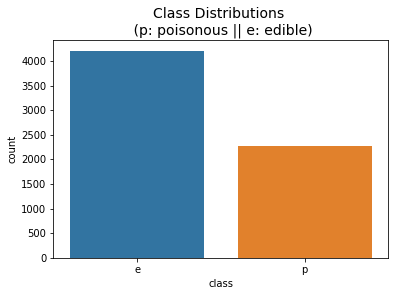

e    4208
p    2262
Name: class, dtype: int64


In [6]:
sns.countplot('class', data=df_mushrooms)
plt.title('Class Distributions \n (p: poisonous || e: edible)', fontsize=14)
plt.show()
print(df_mushrooms['class'].value_counts())

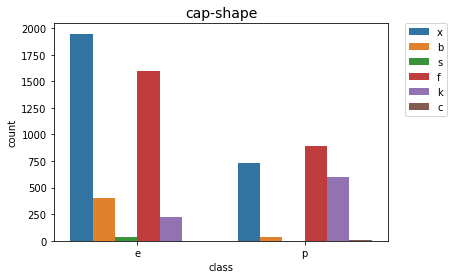

x    2679
f    2486
k     825
b     444
s      32
c       4
Name: cap-shape, dtype: int64


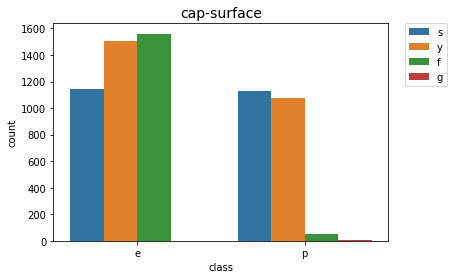

y    2579
s    2274
f    1614
g       3
Name: cap-surface, dtype: int64


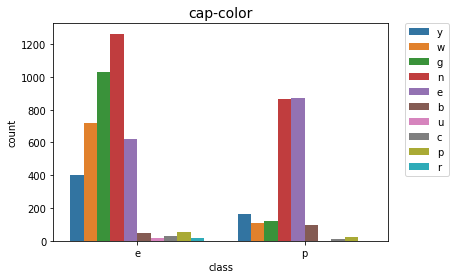

n    2131
e    1494
g    1154
w     826
y     565
b     147
p      77
c      44
r      16
u      16
Name: cap-color, dtype: int64


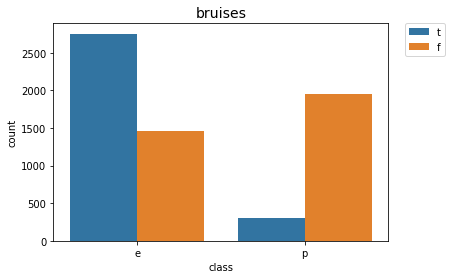

f    3413
t    3057
Name: bruises, dtype: int64


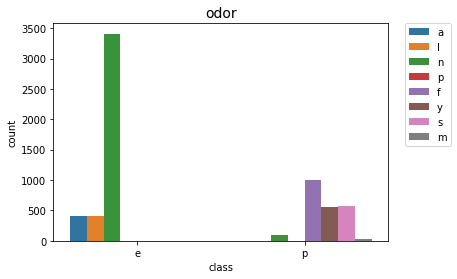

n    3510
f     993
s     569
y     561
a     400
l     400
m      36
p       1
Name: odor, dtype: int64


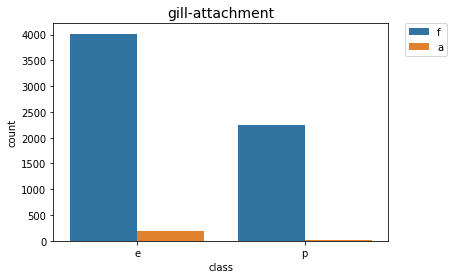

f    6260
a     210
Name: gill-attachment, dtype: int64


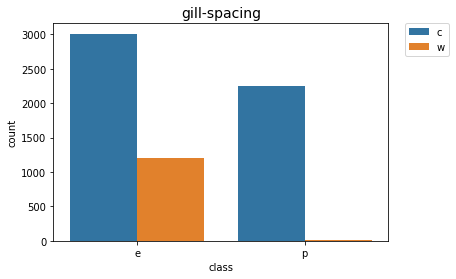

c    5256
w    1214
Name: gill-spacing, dtype: int64


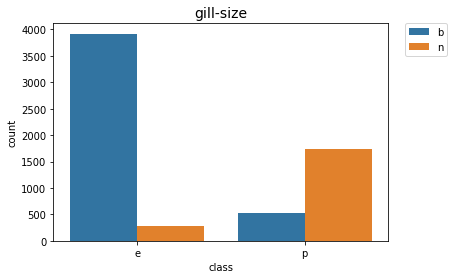

b    4442
n    2028
Name: gill-size, dtype: int64


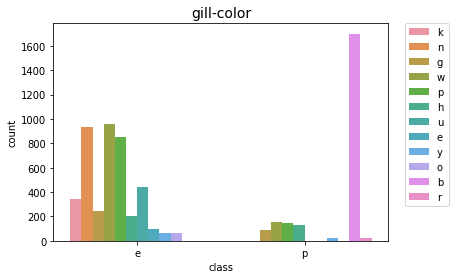

b    1700
w    1110
p     999
n     936
u     444
k     345
g     334
h     332
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64


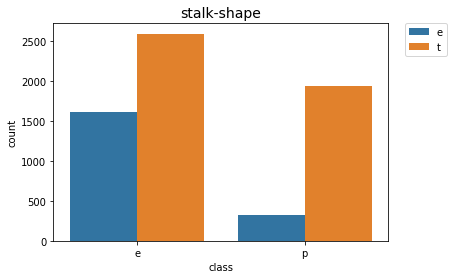

t    4527
e    1943
Name: stalk-shape, dtype: int64


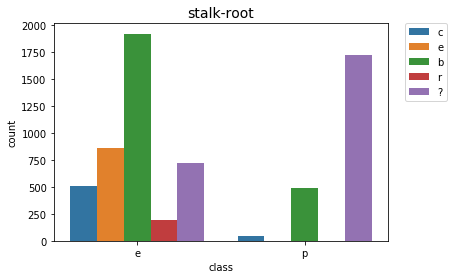

?    2445
b    2412
e     865
c     556
r     192
Name: stalk-root, dtype: int64


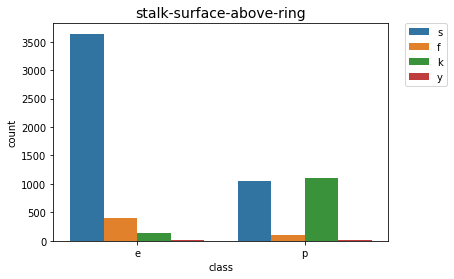

s    4689
k    1241
f     516
y      24
Name: stalk-surface-above-ring, dtype: int64


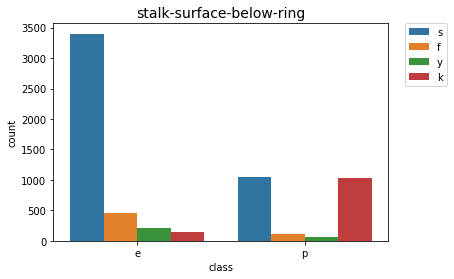

s    4445
k    1179
f     569
y     277
Name: stalk-surface-below-ring, dtype: int64


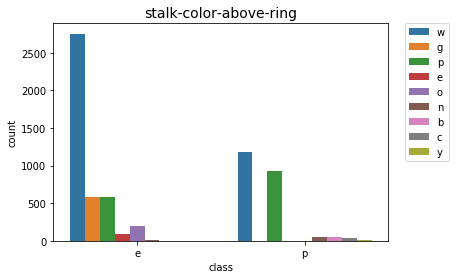

w    3933
p    1503
g     576
o     192
e      96
n      71
b      55
c      36
y       8
Name: stalk-color-above-ring, dtype: int64


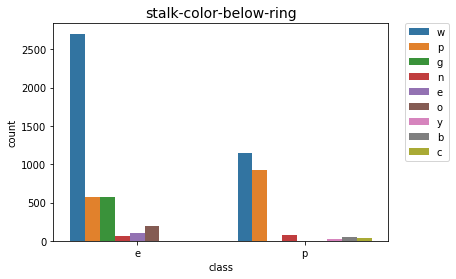

w    3856
p    1496
g     576
o     192
n     139
e      96
b      56
c      36
y      23
Name: stalk-color-below-ring, dtype: int64


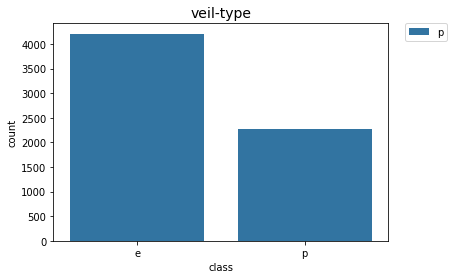

p    6470
Name: veil-type, dtype: int64


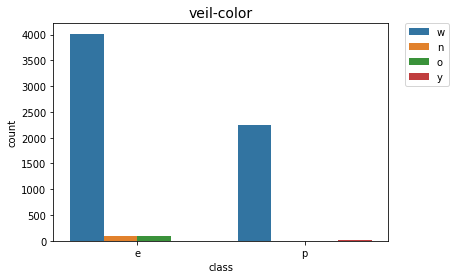

w    6270
o      96
n      96
y       8
Name: veil-color, dtype: int64


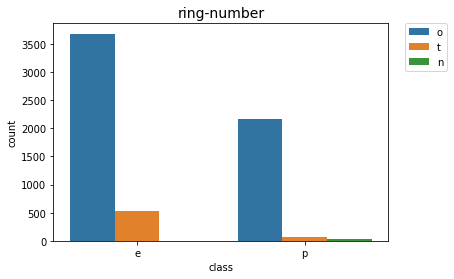

o    5843
t     591
n      36
Name: ring-number, dtype: int64


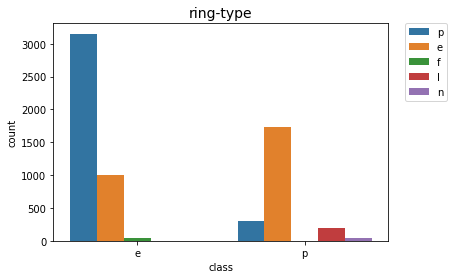

p    3457
e    2741
l     188
f      48
n      36
Name: ring-type, dtype: int64


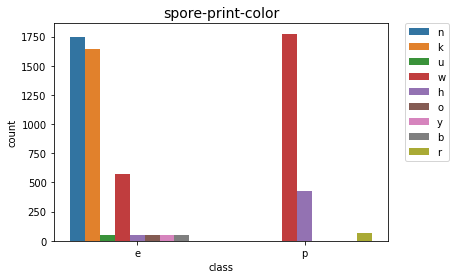

w    2351
n    1744
k    1649
h     471
r      63
o      48
b      48
y      48
u      48
Name: spore-print-color, dtype: int64


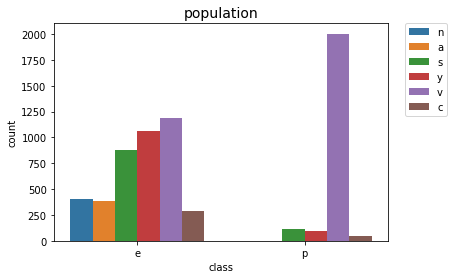

v    3195
y    1157
s     996
n     400
a     384
c     338
Name: population, dtype: int64


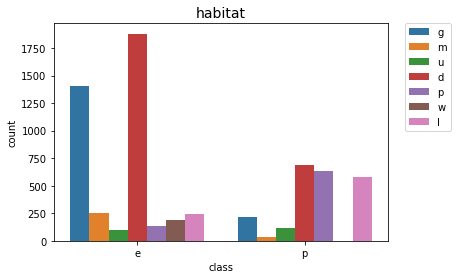

d    2564
g    1627
l     820
p     771
m     288
u     208
w     192
Name: habitat, dtype: int64


In [7]:
for col in df_mushrooms.columns:
    if col != 'class':
        sns.countplot('class', hue=col, data=df_mushrooms)
        plt.title(col, fontsize=14)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        print(df_mushrooms[col].value_counts())

## Transform Cateorical Values into Binary Representations then into Numpy Arrays

In [8]:
df_mushrooms_dummies = pd.get_dummies(df_mushrooms) # get dummies
df_mushrooms_dummies = df_mushrooms_dummies.drop('class_p', axis=1) # drop poisonous (p), edible (e) will be our class
print(df_mushrooms_dummies)
X = np.array(df_mushrooms_dummies.drop('class_e', axis=1))
y = np.array(df_mushrooms_dummies['class_e'])

      class_e  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  \
1           1            0            0            0            0   
2           1            1            0            0            0   
4           1            0            0            0            0   
5           1            0            0            0            0   
6           1            1            0            0            0   
...       ...          ...          ...          ...          ...   
8114        0            0            0            1            0   
8116        0            0            0            0            1   
8117        0            0            0            0            1   
8118        0            0            0            0            1   
8122        0            0            0            0            1   

      cap-shape_s  cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  \
1               0            1              0              0              1   
2            

## Classification Methods

### Baseline Methods

In [9]:
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)
rf_clf = RandomForestClassifier(random_state=0, max_depth=2)

#### Decision Tree Classifier

In [10]:
dt_baseline = scoring_baseline(X, y, dt_clf, 'Decision Tree', 'f1')

SCORES FOR MODEL DECISION TREE:
ACCURACY: 0.9839 +/- 0.0162
PRECISION: 0.9764 +/- 0.0231
RECALL: 1.0000 +/- 0.0000
F1: 0.9879 +/- 0.0120


#### Random Forest Classifier

In [11]:
rf_baseline = scoring_baseline(X, y, rf_clf, 'Random Forest Tree', 'f1')

SCORES FOR MODEL RANDOM FOREST TREE:
ACCURACY: 0.9430 +/- 0.0730
PRECISION: 0.9285 +/- 0.0880
RECALL: 1.0000 +/- 0.0000
F1: 0.9607 +/- 0.0494


### Typical Methods: Resampling

#### Oversample

Using random oversampling to balance dataset.
Only oversampling train sample to avoid data bleeding.

In [12]:
n = 10 # Number of splits
splitter = StratifiedKFold(n_splits=n) # Stratified Splitter
y_predicted = []
y_true = []

for train_index, test_index in splitter.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(X_train, y_train)
    
    rf = RandomForestClassifier(random_state=0, max_depth=2)
    rf.fit(X_over, y_over)
    y_predicted.append(rf.predict(X_test))
    y_true.append(y_test)
    
rf_over = scoring(y_true, y_predicted, 'f1')

SCORES FOR MODEL:
ACCURACY: 0.9436 +/- 0.0688
PRECISION: 0.9655 +/- 0.0376
RECALL: 0.9436 +/- 0.0688
F1: 0.9479 +/- 0.0623


#### Undersample

Undersampling using Random Undersampling to remove examples from the majority class.

In [13]:
n = 10 # Number of splits
splitter = StratifiedKFold(n_splits=n) # Stratified Splitter
y_predicted = []
y_true = []

for train_index, test_index in splitter.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_under, y_under = undersample.fit_resample(X_train, y_train)
    
    rf = RandomForestClassifier(random_state=0, max_depth=2)
    rf.fit(X_under, y_under)
    y_predicted.append(rf.predict(X_test))
    y_true.append(y_test)
    
rf_under = scoring(y_true, y_predicted, 'f1')

SCORES FOR MODEL:
ACCURACY: 0.9465 +/- 0.0675
PRECISION: 0.9675 +/- 0.0368
RECALL: 0.9465 +/- 0.0675
F1: 0.9507 +/- 0.0613


### New Method

A combination of supervised and unsupervised learning.

1 - Unsupervised clustering selection using K-Means to create clusters and Elbow and Silhouette methods to identify the possible optimal K and F1 score to choose in case these disagree.

2 - Training of a Random Forest Classifier per cluster (where needed).

3 - Predicting a cluster using the chosen clustering and a label using the classifier of its assigned cluster.


FOLD: 1


C:\Users\Arely\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


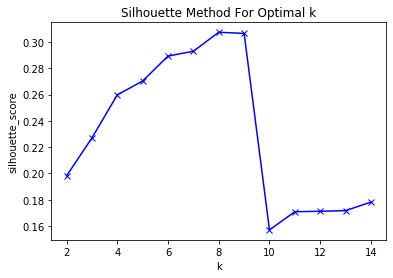

Please enter the selected number of clusters for the silhouette graph:
8


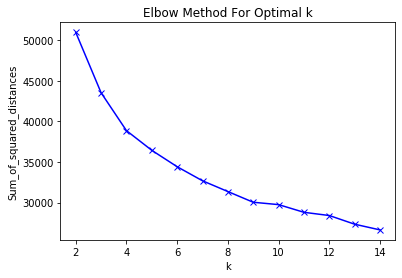

Please enter the selected number of clusters for the elbow graph:
4
Best performing clustering f1-score is: 0.31257686412304175 for n_clusters = 8

FOLD: 2


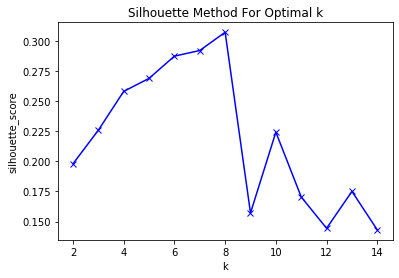

Please enter the selected number of clusters for the silhouette graph:
8


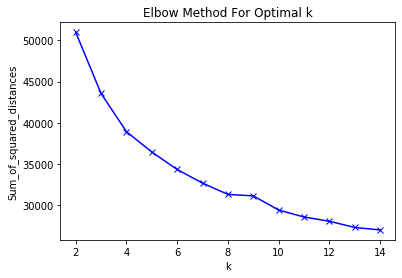

Please enter the selected number of clusters for the elbow graph:
6
Best performing clustering f1-score is: 0.0842668454039729 for n_clusters = 6

FOLD: 3


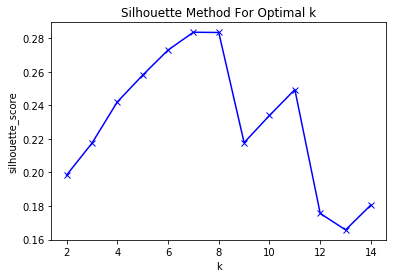

Please enter the selected number of clusters for the silhouette graph:
7


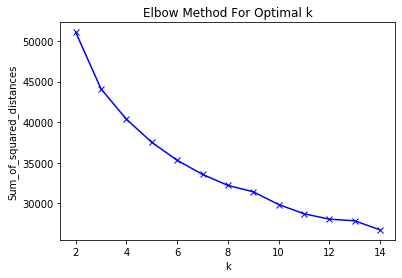

Please enter the selected number of clusters for the elbow graph:
5
Best performing clustering f1-score is: 0.4428097831267512 for n_clusters = 5

FOLD: 4


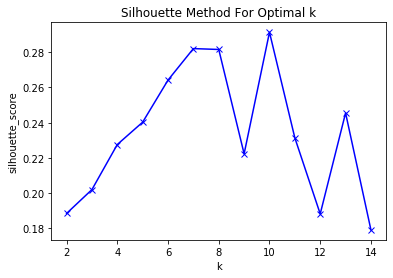

Please enter the selected number of clusters for the silhouette graph:
10


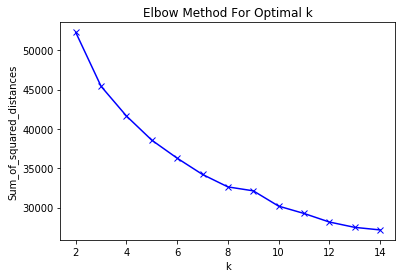

Please enter the selected number of clusters for the elbow graph:
4
Best performing clustering f1-score is: 0.24188587336696474 for n_clusters = 9

FOLD: 5


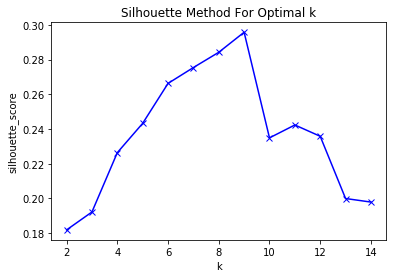

Please enter the selected number of clusters for the silhouette graph:
9


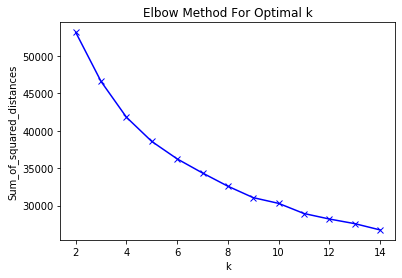

Please enter the selected number of clusters for the elbow graph:
5
Best performing clustering f1-score is: 0.36084485908579733 for n_clusters = 7

FOLD: 6


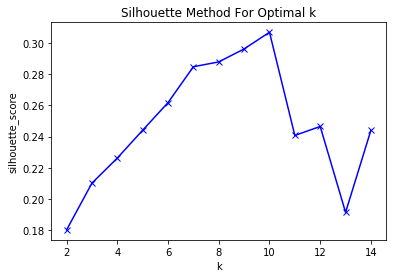

Please enter the selected number of clusters for the silhouette graph:
10


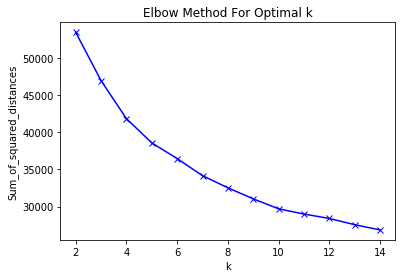

Please enter the selected number of clusters for the elbow graph:
5
Best performing clustering f1-score is: 0.1750327063088418 for n_clusters = 5

FOLD: 7


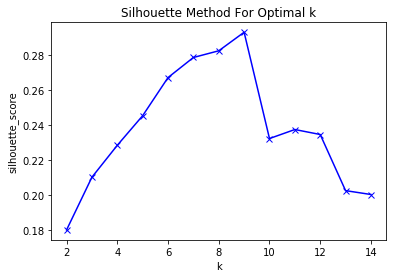

Please enter the selected number of clusters for the silhouette graph:
9


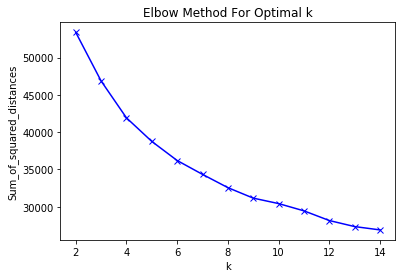

Please enter the selected number of clusters for the elbow graph:
5
Best performing clustering f1-score is: 0.0770314890627555 for n_clusters = 5

FOLD: 8


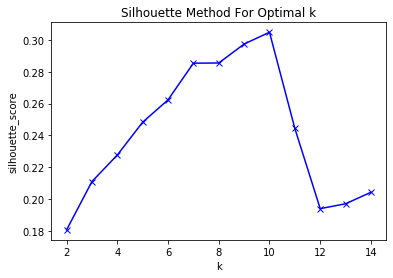

Please enter the selected number of clusters for the silhouette graph:
10


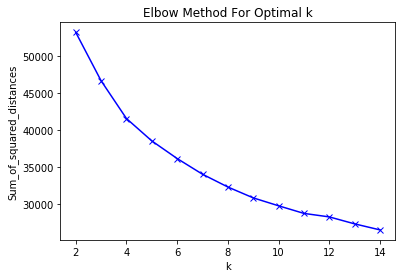

Please enter the selected number of clusters for the elbow graph:
4
Best performing clustering f1-score is: 0.3519897432836736 for n_clusters = 4

FOLD: 9


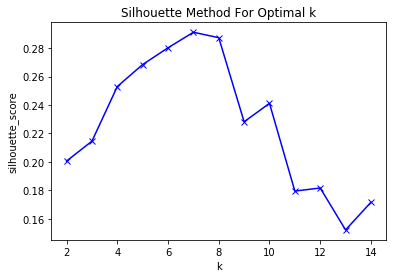

Please enter the selected number of clusters for the silhouette graph:
7


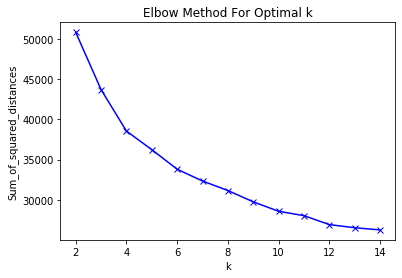

Please enter the selected number of clusters for the elbow graph:
4
Best performing clustering f1-score is: 0.13236987920571122 for n_clusters = 4

FOLD: 10


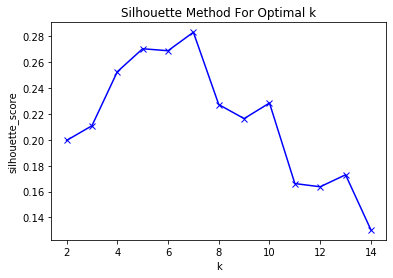

Please enter the selected number of clusters for the silhouette graph:
7


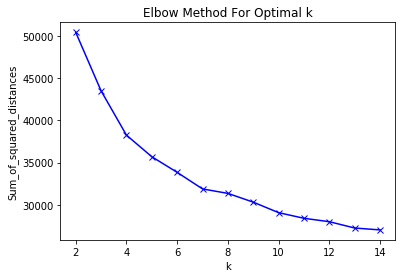

Please enter the selected number of clusters for the elbow graph:
4
Best performing clustering f1-score is: 0.42873839777843853 for n_clusters = 5


In [14]:
n = 10
fold = 1
splitter = StratifiedKFold(n_splits=n, random_state=0)
y_predicted_list = []
y_true_list = []

for train_index, test_index in splitter.split(X, y):
    print('\nFOLD:', fold)
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    k, chosen_km = silhouette_elbow_cluster_selection(X_train, y_train)
    
    clfs = cluster_training(X_train, y_train, k, chosen_km)
    
    y_predicted_list.append(cluster_testing(X_test, chosen_km, clfs))
    
    y_true_list.append(y_test)

In [15]:
scores = scoring(y_true_list, y_predicted_list, 'f1')

SCORES FOR MODEL:
ACCURACY: 0.4017 +/- 0.3940
PRECISION: 0.4413 +/- 0.3902
RECALL: 0.4017 +/- 0.3940
F1: 0.4091 +/- 0.3909


## Model Comparison

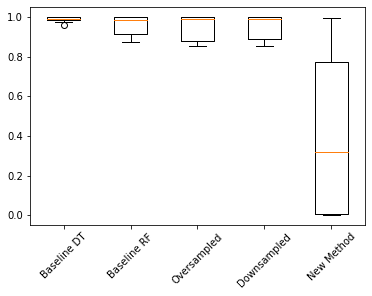

In [16]:
fig, ax = plt.subplots()
labels = ["Baseline DT", "Baseline RF", "Oversampled", "Downsampled", "New Method"]
ax.boxplot([dt_baseline, rf_baseline, rf_over, rf_under, scores])
ax.set_xticklabels(labels, rotation=45)
plt.show()

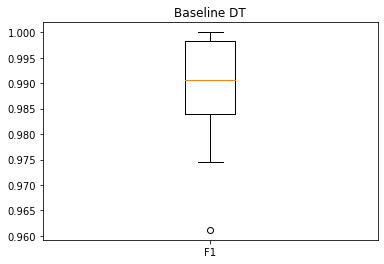

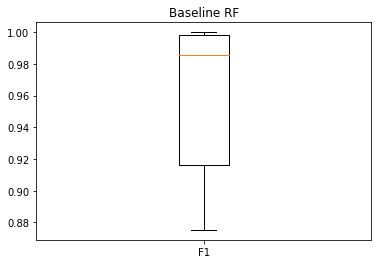

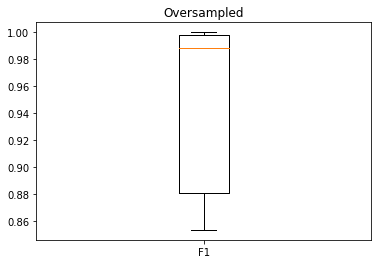

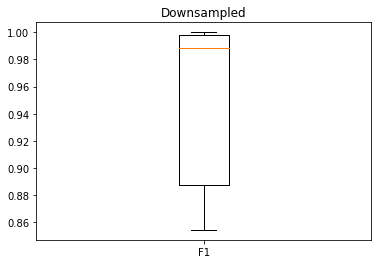

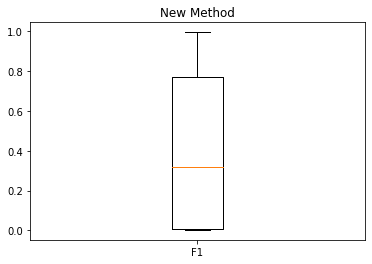

In [17]:
titles = ["Baseline DT", "Baseline RF", "Oversampled", "Downsampled", "New Method"]
plots = [dt_baseline, rf_baseline, rf_over, rf_under, scores]

for plot in range(5):
    boxplot(plots[plot], titles[plot])

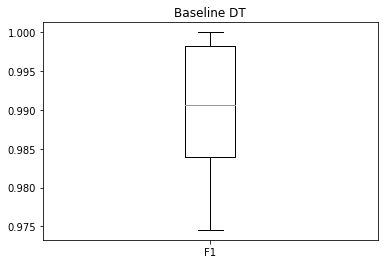

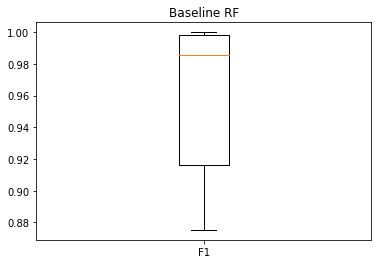

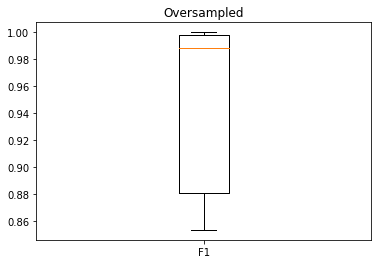

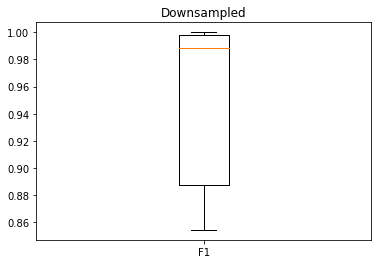

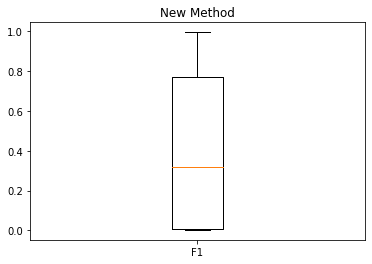

In [18]:
o_titles = ["Baseline DT", "Baseline RF", "Oversampled", "Downsampled", "New Method"]
o_plots = [dt_baseline, rf_baseline, rf_over, rf_under, scores]

for plot in range(5):
    noOutliers_boxplot(o_plots[plot], o_titles[plot])